In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



In [4]:

df=pd.read_excel('deliveries_updated_mens_ipl_upto_2024.xlsx')
# df.head()

In [5]:
df.columns

Index(['matchId', 'inning', 'over_ball', 'over', 'ball', 'batting_team',
       'bowling_team', 'batsman', 'non_striker', 'bowler', 'batsman_runs',
       'extras', 'isWide', 'isNoBall', 'Byes', 'LegByes', 'Penalty',
       'dismissal_kind', 'player_dismissed', 'date'],
      dtype='object')

In [6]:
df["matchId"].nunique()

1095

<BarContainer object of 10 artists>

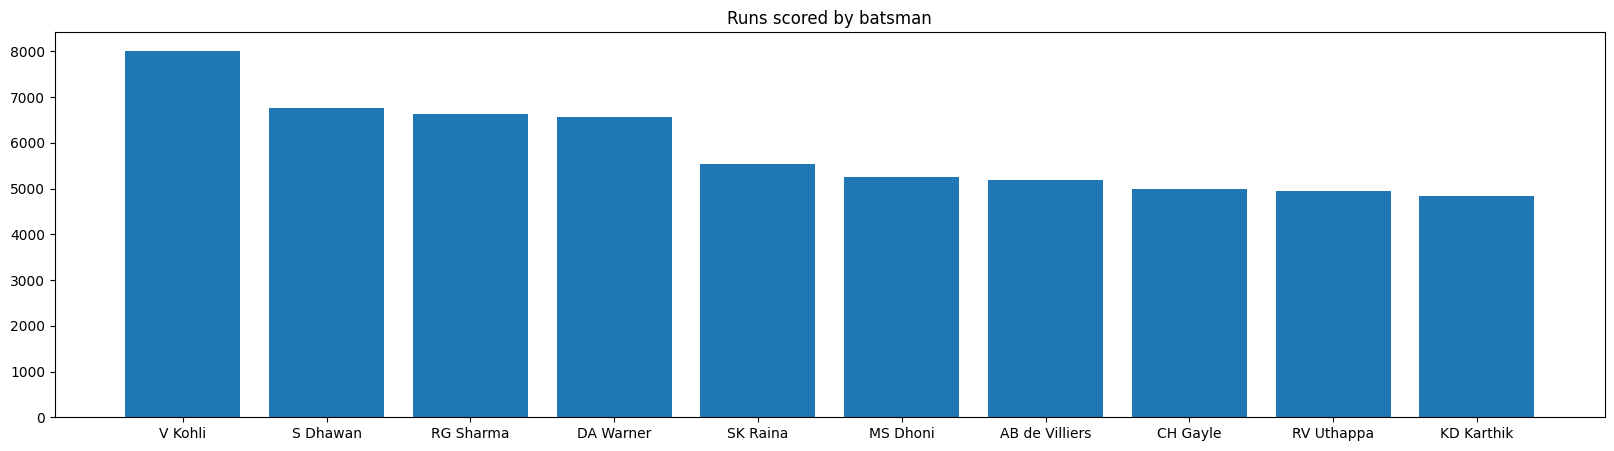

In [25]:
#Overall total runs
batsmanRun=df.groupby("batsman")["batsman_runs"].sum().reset_index()
batsmanRun=batsmanRun.sort_values(by="batsman_runs",ascending=False)

plt.figure(figsize=(20,5))
plt.title("Runs scored by batsman")
plt.bar(batsmanRun.head(10).batsman,batsmanRun.head(10).batsman_runs)

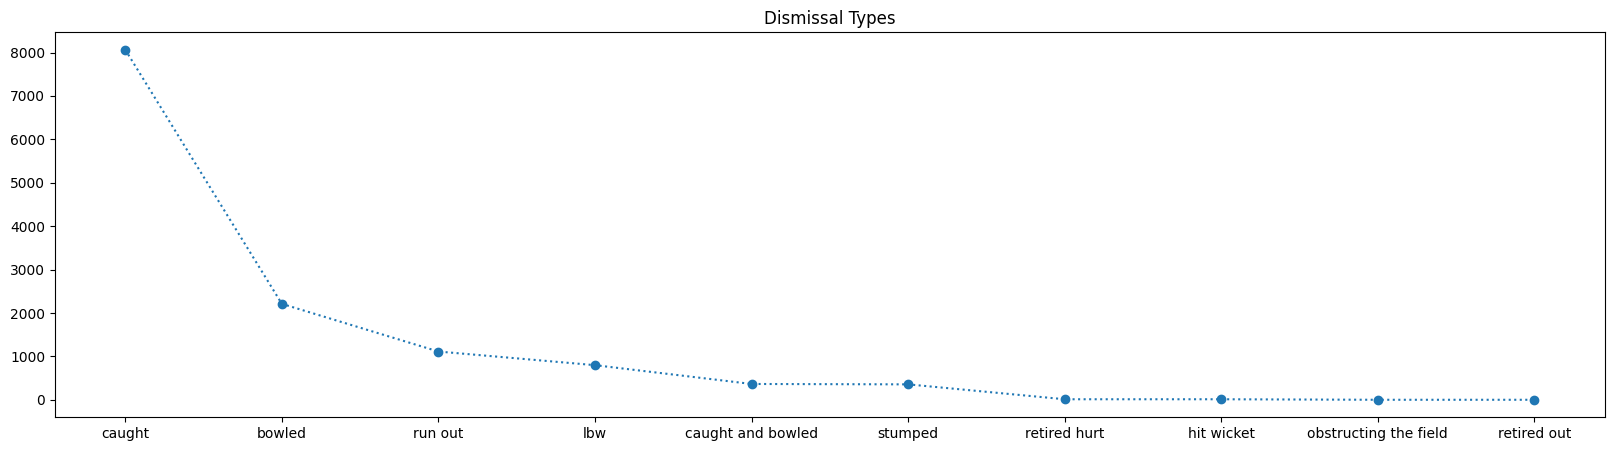

In [26]:
#Dismissal kind
type_of_dismisss_count=df["dismissal_kind"].dropna().value_counts()
# type_of_dismisss_count
plt.figure(figsize=(20,5))
plt.title("Dismissal Types")
plt.plot(list(type_of_dismisss_count.keys()),list(type_of_dismisss_count.values),linestyle=':',marker='o',label="Types Of Dismissal")

<BarContainer object of 10 artists>

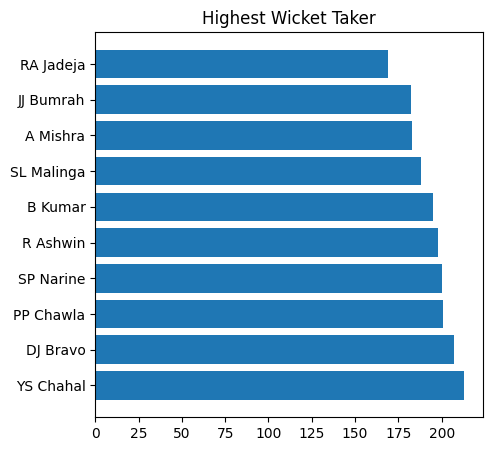

In [27]:
#Bowler taking highest number of wickets

bowl_df=df[df["dismissal_kind"].notna()]

wicket_count=bowl_df["bowler"].value_counts().sort_values(ascending=False)
wicket_count_top=wicket_count.head(10)
plt.figure(figsize=(5,5))
plt.title("Highest Wicket Taker")
plt.barh(list(wicket_count_top.keys()),list(wicket_count_top.values))

In [10]:
# # Team which won Most number of matches

# unique_matches=df["matchId"].unique()

# def totalRuns(batsman_runs,extras):
#     return batsman_runs+extras

<BarContainer object of 10 artists>

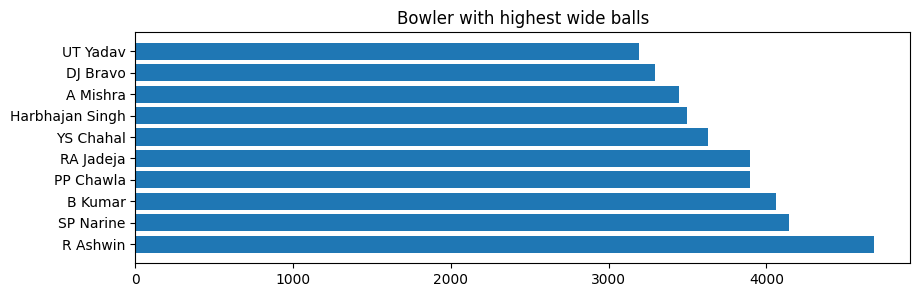

In [29]:
isWide=df[df["isWide"].notna()]
bowler_wide_count=isWide["bowler"].value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,3))
plt.title("Bowler with highest wide balls")
plt.barh(list(bowler_wide_count.keys()),list(bowler_wide_count.values))




<BarContainer object of 10 artists>

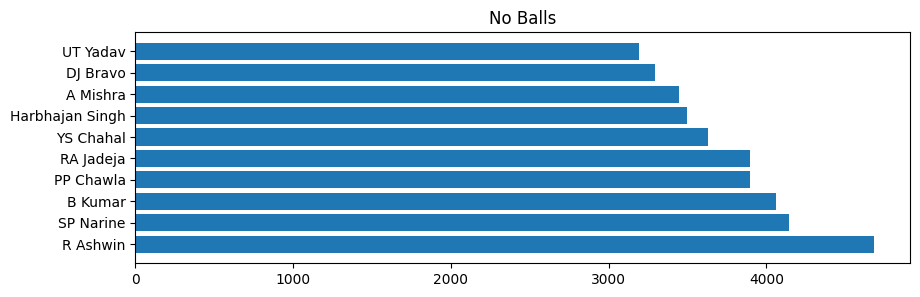

In [31]:
isNoBall=df[df["isNoBall"].notna()]
bowler_noball_count=isNoBall["bowler"].value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,3))
plt.title("No Balls")
plt.barh(list(bowler_noball_count.keys()),list(bowler_noball_count.values))

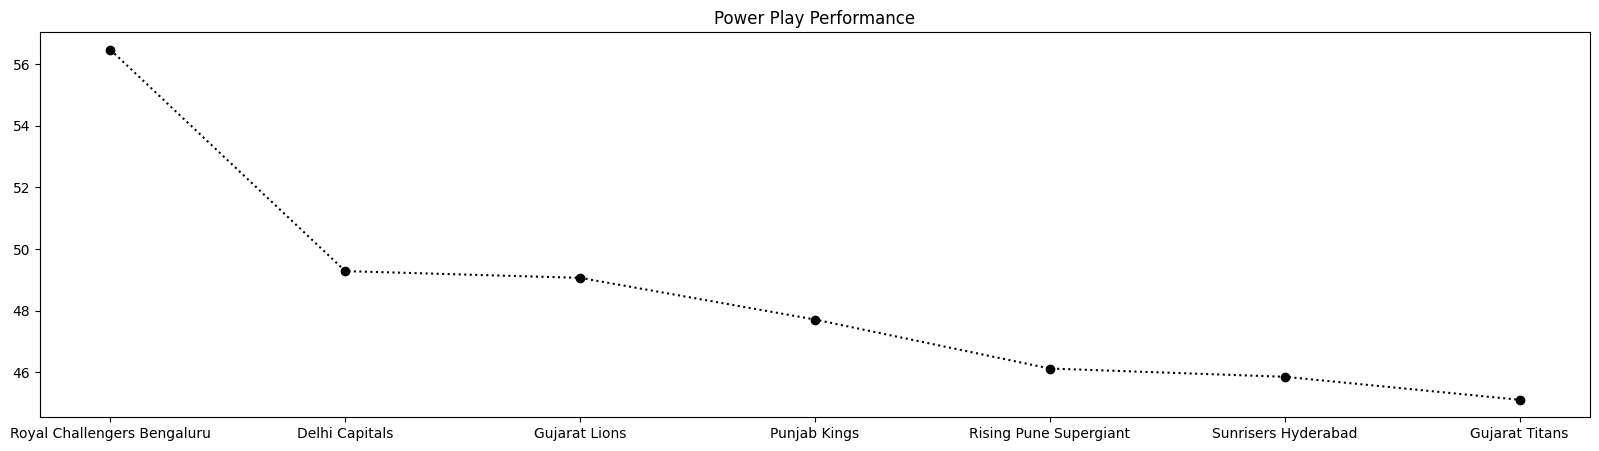

In [32]:
# Power Play Performace

match_id=df["matchId"].unique()
power_play_all=df[(df["over_ball"]>0) & (df["over_ball"]<=5.6)]

power_play_total_runs=power_play_all.groupby(["matchId","batting_team"])["batsman_runs"].sum().reset_index()
power_play_total_runs=power_play_total_runs.sort_values(by="batsman_runs",ascending=False)
power_play_total_runs=power_play_total_runs.drop("matchId",axis=1)
power_play_average=power_play_total_runs.groupby("batting_team")["batsman_runs"].mean().reset_index()
power_play_average=power_play_average.sort_values(by="batsman_runs",ascending=False)
power_play_average=power_play_average.reset_index(drop=True)
power_play_average

#Plotting
plt.figure(figsize=(20,5))
plt.title("Power Play Performance")
plt.plot(power_play_average.head(7).batting_team,power_play_average.head(7).batsman_runs,color='black',linestyle=':',marker='o')


<BarContainer object of 19 artists>

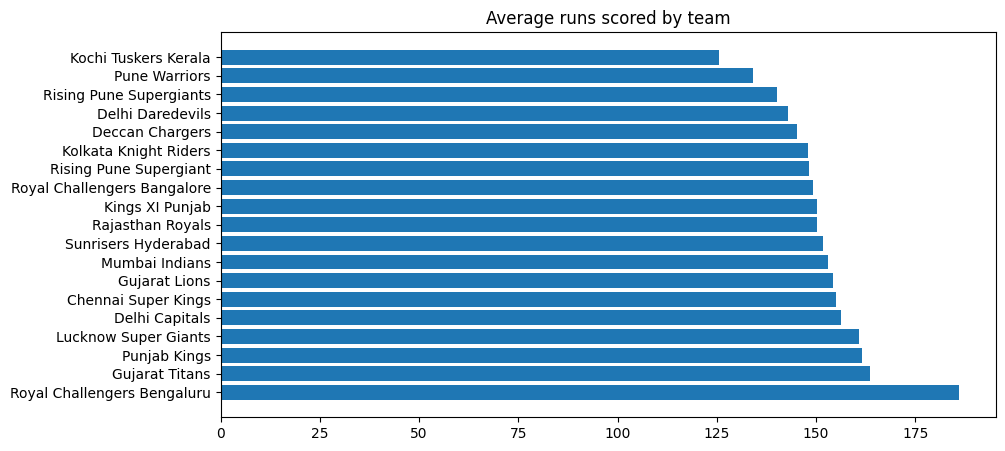

In [33]:
#Average runs scored by a team in match

team_average_run=df.groupby(["batting_team","matchId"])["batsman_runs"].sum().reset_index()
team_average_run=team_average_run.drop("matchId",axis=1)
team_average_run=team_average_run.groupby(["batting_team"])["batsman_runs"].mean().sort_values(ascending=False)
team_average_run

#plotting
plt.figure(figsize=(10,5))
plt.title("Average runs scored by team")
plt.barh(list(team_average_run.keys()),list(team_average_run.values))


<BarContainer object of 19 artists>

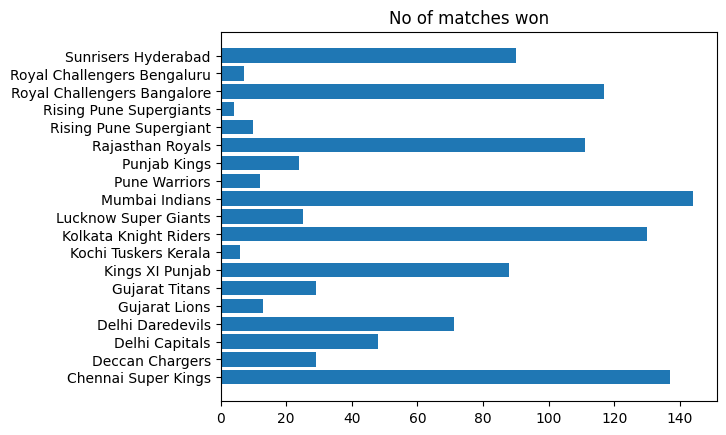

In [34]:
# Won most number of matches
df["total_runs"]=df["batsman_runs"]+df["extras"]
matches_won=df.groupby(["matchId","batting_team"])["total_runs"].sum().reset_index()
matches_won = matches_won.loc[
    matches_won.groupby("matchId")["total_runs"].idxmax()
]
matches_won_count=matches_won["batting_team"].value_counts().sort_index()
plt.title("No of matches won")
plt.barh(list(matches_won_count.keys()),list(matches_won_count.values))



<BarContainer object of 19 artists>

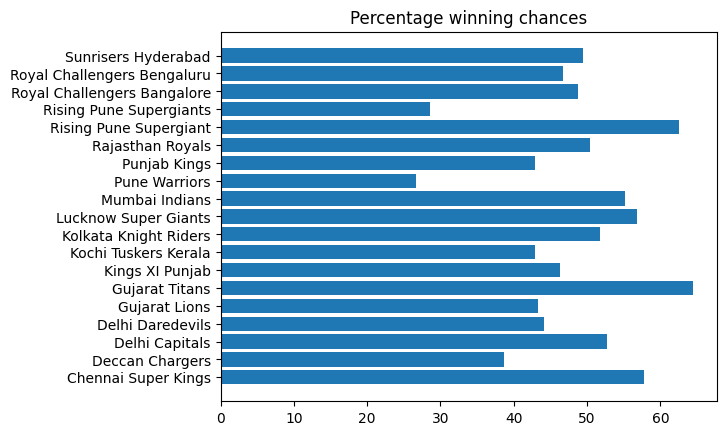

In [35]:
# Winning chances

no_of_matches_played=df.groupby(["matchId","batting_team"])["total_runs"].sum().reset_index()
no_of_matches_played=no_of_matches_played["batting_team"].value_counts()
no_of_matches_played=no_of_matches_played.sort_index()



new_df=pd.DataFrame({
    "Teams":list(no_of_matches_played.keys()),
    "Total number of matches":list(no_of_matches_played.values),
    "Wins":list(matches_won_count.values)
})


new_df["Percentage_win"]=new_df["Wins"]/new_df["Total number of matches"]*100
# print(new_df)
plt.title("Percentage winning chances")
plt.barh(new_df.Teams,new_df.Percentage_win)


<BarContainer object of 10 artists>

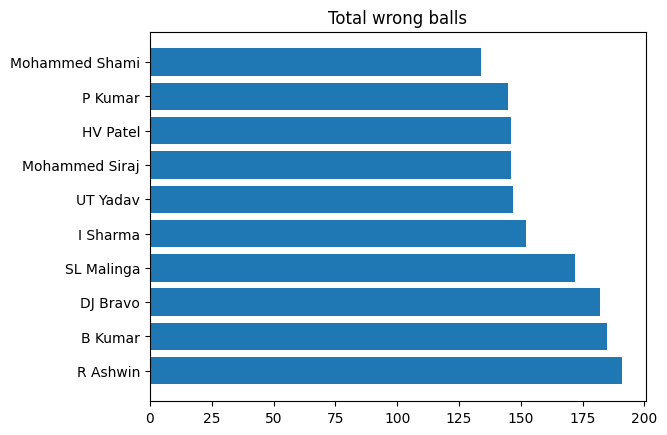

In [36]:
# Wrong balls 
df["isWide"] = df["isWide"].fillna(0).astype(int)    # Convert String to Integers
df["isNoBall"] = df["isNoBall"].fillna(0).astype(int)

df["Wrong_Balls"]=df["isWide"]+df["isNoBall"]
wrong_balls=df.groupby("bowler")["Wrong_Balls"].sum()
wrong_balls=wrong_balls.sort_values(ascending=False).head(10)
plt.title("Total wrong balls")
plt.barh(list(wrong_balls.keys()),list(wrong_balls.values))


<BarContainer object of 30 artists>

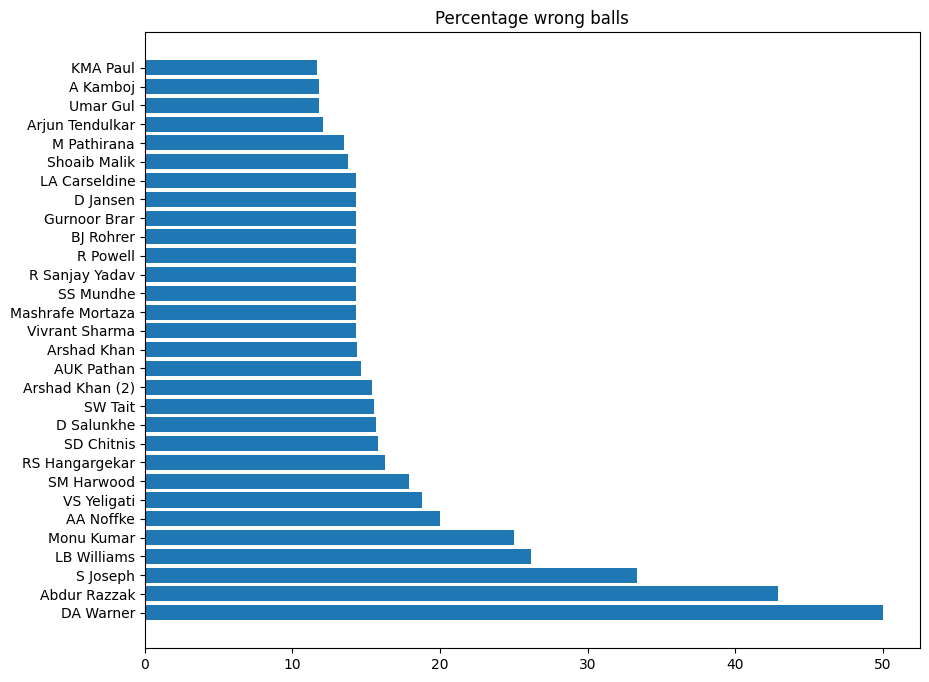

In [37]:
#Percentage of wrong balls

df["isWide"] = df["isWide"].fillna(0).astype(int)
df["isNoBall"] = df["isNoBall"].fillna(0).astype(int)

df["Wrong_Balls"] = df["isWide"] + df["isNoBall"]


df["Wrong_Balls"]=df["isWide"]+df["isNoBall"]
wrong_balls=df.groupby("bowler")["Wrong_Balls"].sum()
wrong_balls
total_balls=df["bowler"].value_counts().sort_index()
total_balls

new_df2=pd.DataFrame({
    "Name":list(total_balls.keys()),
    "Total_Balls":list(total_balls.values),
    "Wrong_Balls":list(wrong_balls.values)
})
new_df2["Wrong_Ball_Percentage"]=new_df2["Wrong_Balls"]/new_df2["Total_Balls"]*100
new_df2=new_df2.sort_values(by="Wrong_Ball_Percentage",ascending=False)
new_df2
plt.figure(figsize=(10,8))
new_df2=new_df2.head(30)
plt.title("Percentage wrong balls")
plt.barh(new_df2.Name,new_df2.Wrong_Ball_Percentage)

<BarContainer object of 20 artists>

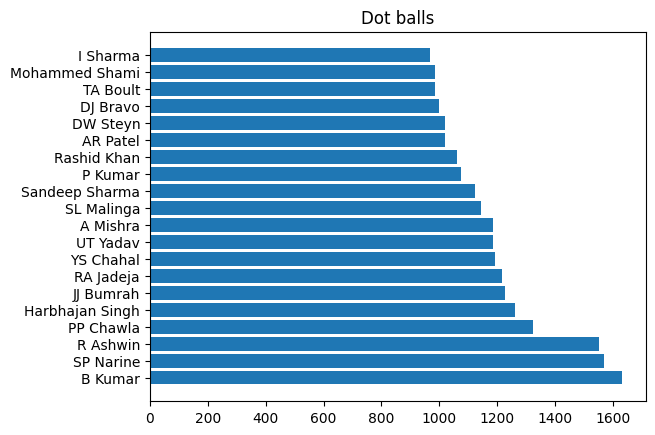

In [ ]:
# Most number of dot balls

dot_balls=df[(df["batsman_runs"]==0) & (df["extras"]==0)]
dot_balls=dot_balls["bowler"].value_counts().sort_values(ascending=False)
dot_balls=dot_balls.head(20)
dot_balls
plt.barh(list(dot_balls.keys()),list(dot_balls.values))
